In [2]:
#načtení souboru pomocí knihovny pandas
import pandas as pd

data = pd.read_csv('cukrarny_union_vz2.csv')

data_test = pd.read_csv('testovaci_data.csv')

In [3]:
#nejdříve jsem odtsranila cukrárny s hodnocením -1, pak jsem score vynásobila 2* abych dostala celá čísla
dataset = data[data['score'] != -1]
dataset['score_class'] = dataset['score'] * 2
dataset = dataset[['gps_latitude', 'gps_longitude', 'zip', 'score_class']]
dataset

/var/folders/yk/_3vbg5p15dn369l44x9rzw0w0000gn/T/ipykernel_33505/2096787985.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['score_class'] = dataset['score'] * 2


,gps_latitude,gps_longitude,zip,score_class
0,50.027298,14.415344,14700,10.0
1,50.098740,14.398405,16000,10.0
2,50.150238,14.498274,19600,9.0
3,50.062840,14.314292,15500,9.0
4,50.044117,14.456076,14000,9.0
...,...,...,...,...
643,50.082146,14.417810,11000,10.0
645,50.087471,14.405745,11800,10.0
646,50.098026,14.405343,16000,10.0
647,50.085983,14.417479,11000,10.0


Text(0.5, 1.0, 'Correlation On Score')

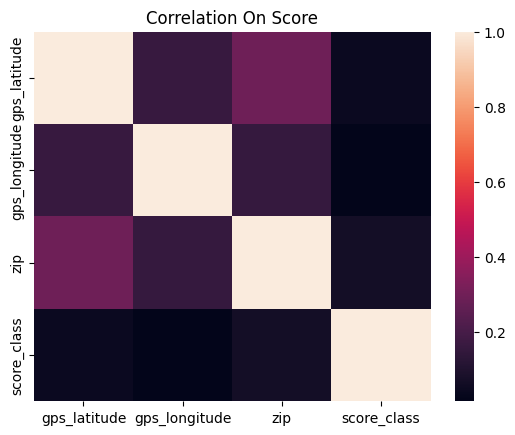

In [4]:
#vztah mezi použitými sloupci, už tady je vidět že tam žádný není
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1)
sns.heatmap(dataset.corr())
plt.title('Correlation On Score')

In [6]:
#rozdělení datasetu na test a train a oddělení score od zbytku hodnot
X = dataset.iloc[:,:-1]
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X_train)
print(y_test)


     gps_latitude  gps_longitude    zip
543     50.028271      14.403640  14700
208     50.056732      14.421130  14700
368     50.086475      14.413889  11000
646     50.098026      14.405343  16000
196     50.087700      14.469047  13000
..            ...            ...    ...
85      50.082737      14.426761  11000
341     50.005436      14.416218  14300
9       50.046520      14.310788  15500
442     50.079002      14.421479  12000
230     50.065575      14.452452  10100

[421 rows x 3 columns]
[ 9. 10.  7.  9.  9. 10.  9.  9. 10.  9.  9. 10. 10. 10. 10. 10. 10. 10.
 10.  7.  9. 10.  9. 10. 10. 10.  9.  8. 10.  8. 10. 10.  8.  9.  8.  9.
  8.  4.  4.  8. 10.  9.  9.  9. 10.  7.  9.  8.  9. 10. 10.  9.  7.  9.
  9. 10. 10.  9.  9.  9.  9.  5. 10. 10.  8. 10. 10.  8.  5.  8.  9. 10.
 10. 10. 10.  8. 10.  9.  9.  8. 10.  2. 10. 10.  9.  8. 10. 10. 10.  8.
 10.  9.  2.  9.  7. 10. 10.  9.  0. 10. 10. 10.  9.  9.  6.  8.]


In [7]:
#klasifikace pomocí DecisionTreeClassifier
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
# tree.plot_tree(clf)

In [8]:
#předpověď 
y_pred = clf.predict(X_test)




In [9]:
#kontrola správnosti předpovědi
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[ 0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  1  1]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  2]
 [ 0  0  0  0  1  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  1  4]
 [ 0  0  0  0  0  0  0  2  2 11]
 [ 0  0  1  0  1  0  1  2 13 15]
 [ 0  1  0  0  1  2  2  5 11 23]]
Accuracy: 29.24 %
Standard Deviation: 6.80 %


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
